# Problem Statement and Business Understanding

Major bank company want to offer a new banking product based on behavior of customer spending. This is due to increase of attried customer, new product need to be appealing enough so number of attried customer will going down.

Data on Google drive=
https://drive.google.com/drive/folders/1mtv9HgT-gppPilUngPrbplejV5K_WF9n?usp=sharing 

# Environment Preparation

On this section we will prepare our jupyter notebook, so it has all neccessary library to craete a model. 
The data we used is from kaggle dataset, with a little modification so it can be used to learn machine learning step from the start

## Import Library

In [1]:
import pandas as pd #library to wrangling the data
import numpy as np #library to manipulating data
import seaborn as sns #library for visualization
import matplotlib.pyplot as plt #library for visualization
from sklearn.preprocessing import StandardScaler #Scaling variable
from sklearn.model_selection import train_test_split #split training and testing data

# model creation
from sklearn.cluster import AgglomerativeClustering #Hierarchical Clustering
import scipy.cluster.hierarchy as sch #Dendogram graph
from sklearn.cluster import KMeans #KMeans

pd.options.display.float_format = '{:,.2f}'.format #formating of the number

## Load Data

In [2]:
df = pd.read_csv('BankChurners.csv')

In [3]:
df.head().T

,0,1,2,3,4
CLIENTNUM,768805383,818770008,713982108,769911858,709106358
Attrition_Flag,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer
Customer_Age,45.00,49.00,NaN,40.00,40.00
Gender,M,F,M,F,M
Dependent_count,3,5,3,4,3
Education_Level,High School,Graduate,Graduate,High School,Uneducated
Marital_Status,Married,Single,Married,Unknown,Married
Income_Category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K
Card_Category,Blue,Blue,Blue,Blue,Blue
Months_on_book,39,44,36,34,21


In [4]:
df.shape 

(10127, 23)

# New Product Analysis

## Data Cleansing and Exploration

On this section we will making sure the data is on the right format, so it can be used to create a model later.

1. Checking data types
2. Checking null values
3. Checking outlier and invalid data
4. Checking distribution of the data


In [5]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                          float64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [6]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          2
Gender                                                                                                                                2
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        1
Income_Category                                 

In [7]:
df.Customer_Age.fillna(df.Customer_Age.mean(),inplace=True) #insert mean on missing value
df.Gender.fillna(df.Gender.mode(),inplace=True) #insert mode on missing value
df.dropna(inplace=True) #dropping null records

C:\Users\arima\AppData\Local\Temp\ipykernel_27368\1299965578.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Customer_Age.fillna(df.Customer_Age.mean(),inplace=True) #insert mean on missing value
C:\Users\arima\AppData\Local\Temp\ipykernel_27368\1299965578.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [8]:
df.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10124,10124,10124,10124,10124,10124
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8497,5356,3126,4685,3559,9433


In [9]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,"10,124.00","739,177,527.27","36,905,336.56","708,082,083.00","713,035,214.25","717,925,645.50","773,142,108.00","828,343,083.00"
Customer_Age,"10,124.00",46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,"10,124.00",2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,"10,124.00",35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,"10,124.00",3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,"10,124.00",2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,"10,124.00",2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,"10,124.00","8,630.63","9,086.06","1,438.30","2,555.00","4,549.00","11,067.25","34,516.00"
Total_Revolving_Bal,"10,124.00","1,162.58",814.97,0.00,357.00,"1,276.00","1,783.25","2,517.00"
Avg_Open_To_Buy,"10,124.00","7,468.05","9,088.15",3.00,"1,325.00","3,474.50","9,858.00","34,516.00"


In [10]:
df.Attrition_Flag.value_counts()

Attrition_Flag
Existing Customer    8497
Attrited Customer    1627
Name: count, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='Total_Trans_Amt'>

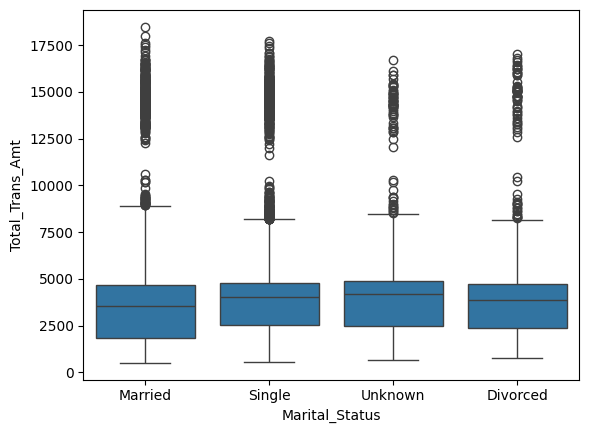

In [11]:
sns.boxplot(data=df,y='Total_Trans_Amt',x='Marital_Status')

<Axes: xlabel='Gender', ylabel='Customer_Age'>

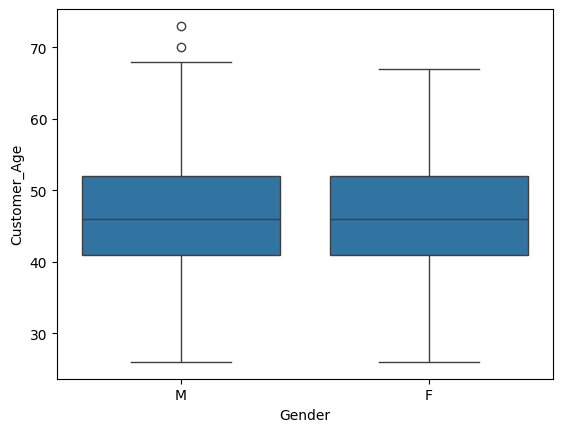

In [12]:
sns.boxplot(data=df,y='Customer_Age',x='Gender')

C:\Users\arima\AppData\Local\Temp\ipykernel_27368\1857656882.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0[['Customer_Age']], hist=True, rug=False)
C:\Users\arima\AppData\Local\Temp\ipykernel_27368\1857656882.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_1[['Customer_

<Axes: ylabel='Density'>

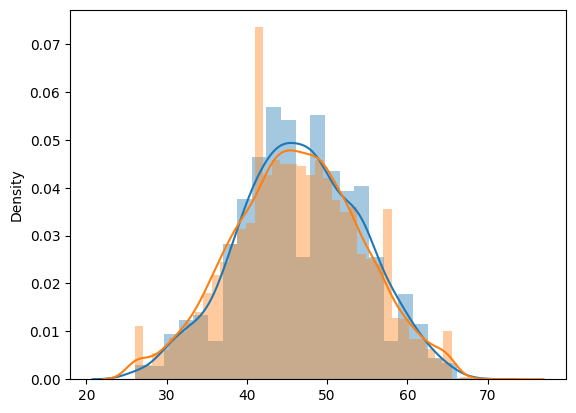

In [13]:
# Sort the dataframe by target
target_0 = df.loc[df['Attrition_Flag'] == 'Attrited Customer']
target_1 = df.loc[df['Attrition_Flag'] != 'Attrited Customer']

sns.distplot(target_0[['Customer_Age']], hist=True, rug=False)
sns.distplot(target_1[['Customer_Age']], hist=True, rug=False)

C:\Users\arima\AppData\Local\Temp\ipykernel_27368\201602949.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_0[['Months_Inactive_12_mon']], hist=True, rug=False)
C:\Users\arima\AppData\Local\Temp\ipykernel_27368\201602949.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_1[['M

<Axes: ylabel='Density'>

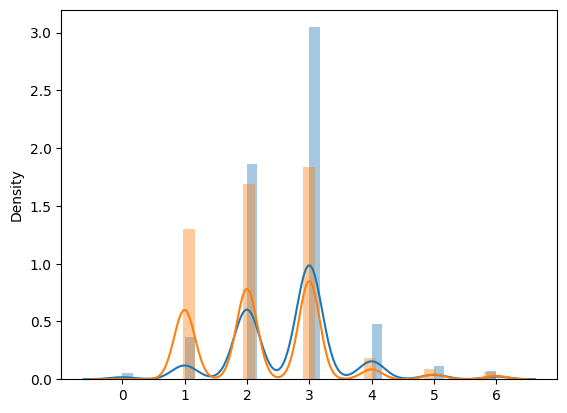

In [14]:
# Sort the dataframe by target
target_0 = df.loc[df['Attrition_Flag'] == 'Attrited Customer']
target_1 = df.loc[df['Attrition_Flag'] != 'Attrited Customer']

sns.distplot(target_0[['Months_Inactive_12_mon']], hist=True, rug=False)
sns.distplot(target_1[['Months_Inactive_12_mon']], hist=True, rug=False)

In [15]:
check_1 = pd.pivot_table(df,values='Customer_Age',index='Card_Category',columns = 'Attrition_Flag',aggfunc='count')
check_1.reset_index(inplace=True)
check_1['Churn_Ratio'] = check_1['Attrited Customer']/(check_1['Existing Customer'] + check_1['Attrited Customer'])
check_1

Attrition_Flag,Card_Category,Attrited Customer,Existing Customer,Churn_Ratio
0,Blue,1519,7914,0.16
1,Gold,21,95,0.18
2,Platinum,5,15,0.25
3,Silver,82,473,0.15


In [16]:
check_2 = pd.pivot_table(df,values='Customer_Age',index='Gender',columns = 'Attrition_Flag',aggfunc='count')
check_2.reset_index(inplace=True)
check_2['Ratio_Churn_Gender'] = check_2['Attrited Customer']/(check_2['Existing Customer'] + check_2['Attrited Customer'])
check_2

Attrition_Flag,Gender,Attrited Customer,Existing Customer,Ratio_Churn_Gender
0,F,930,4426,0.17
1,M,697,4071,0.15


In [17]:
check_3 = pd.pivot_table(df,values='Customer_Age',index='Income_Category',columns = 'Attrition_Flag',aggfunc='count')
check_3.reset_index(inplace=True)
check_3['Ratio_Churn_Income'] = check_3['Attrited Customer']/(check_3['Existing Customer'] + check_3['Attrited Customer'])
check_3

Attrition_Flag,Income_Category,Attrited Customer,Existing Customer,Ratio_Churn_Income
0,$120K +,126,600,0.17
1,$40K - $60K,271,1519,0.15
2,$60K - $80K,189,1213,0.13
3,$80K - $120K,242,1293,0.16
4,Less than $40K,612,2947,0.17
5,Unknown,187,925,0.17


In [18]:
check_4 = pd.pivot_table(df,values='Customer_Age',index='Education_Level',columns = 'Attrition_Flag',aggfunc='count')
check_4.reset_index(inplace=True)
check_4['Ratio_Churn_Education'] = check_4['Attrited Customer']/(check_4['Existing Customer'] + check_4['Attrited Customer'] )
check_4

Attrition_Flag,Education_Level,Attrited Customer,Existing Customer,Ratio_Churn_Education
0,College,154,859,0.15
1,Doctorate,95,356,0.21
2,Graduate,487,2639,0.16
3,High School,306,1707,0.15
4,Post-Graduate,92,423,0.18
5,Uneducated,237,1250,0.16
6,Unknown,256,1263,0.17


<Axes: >

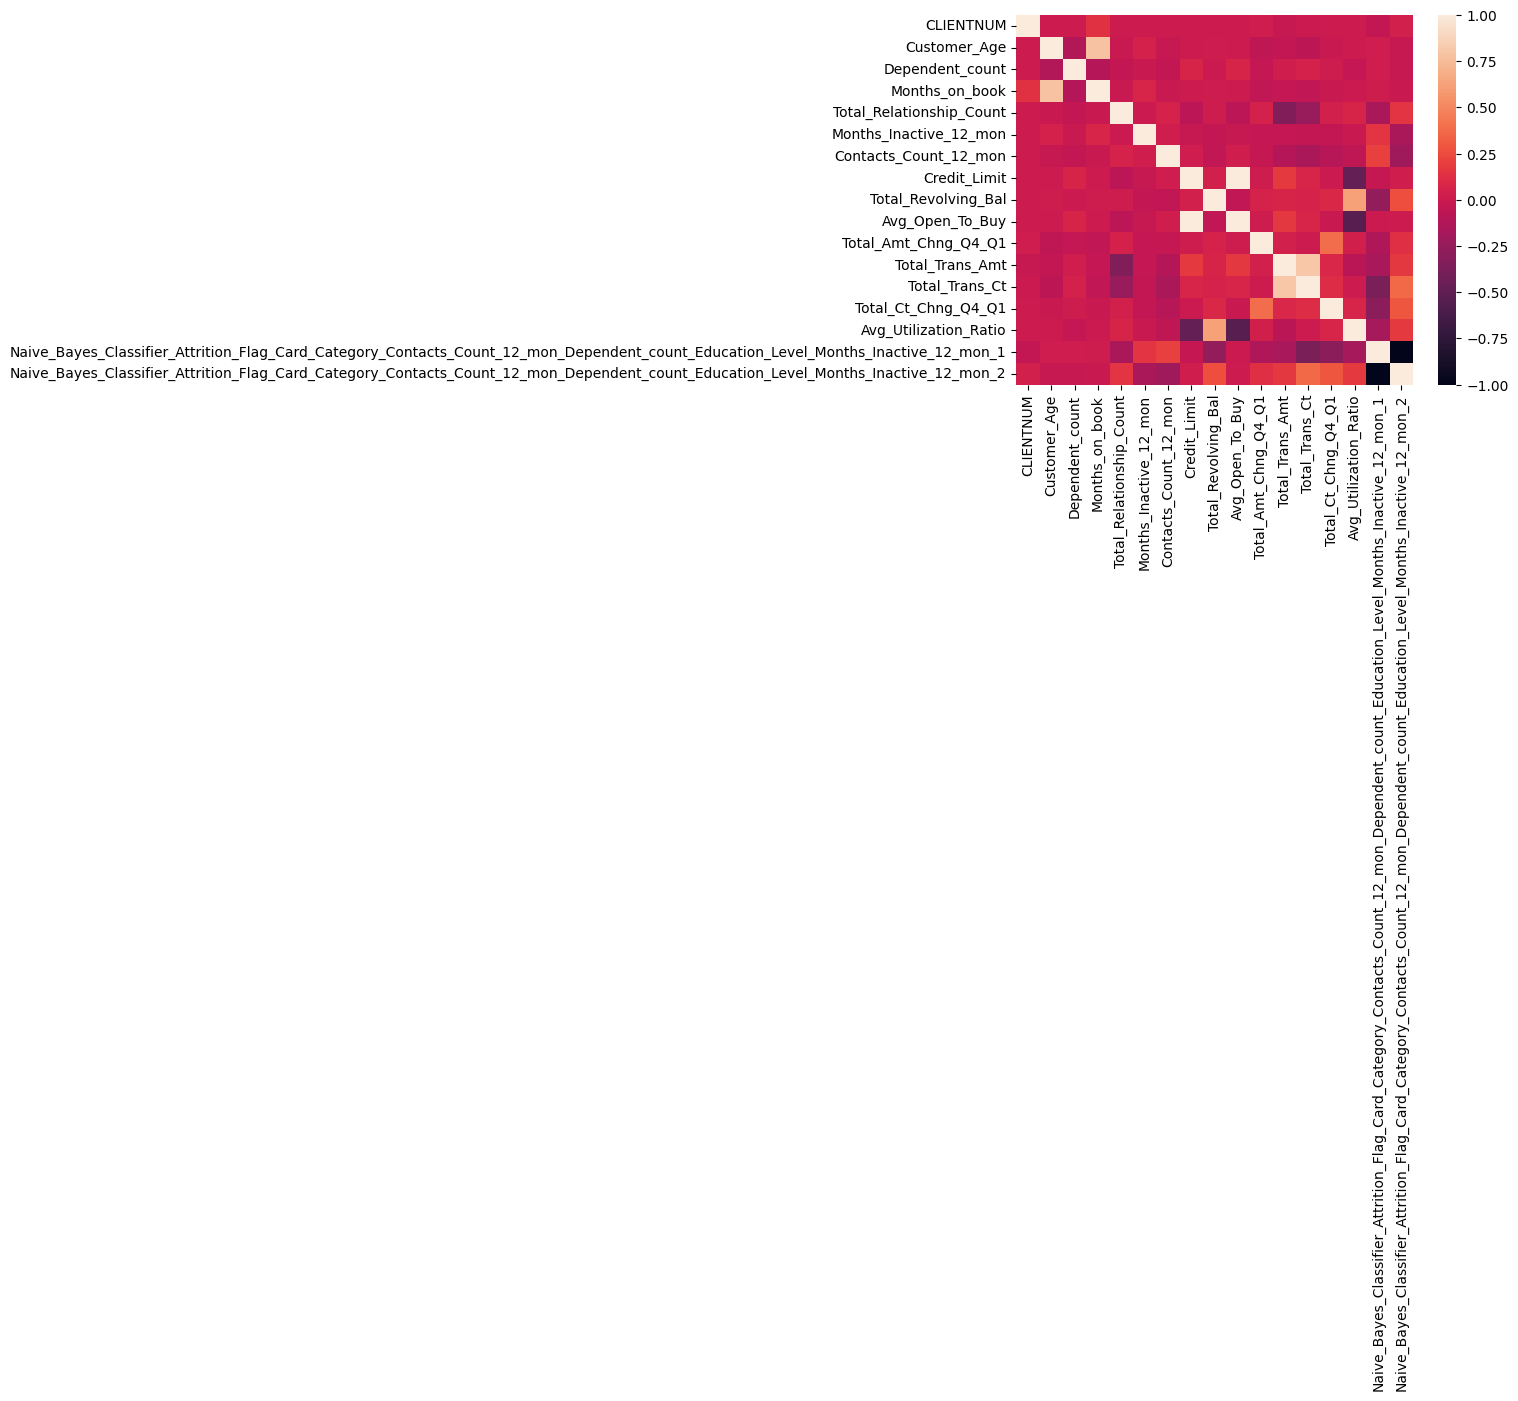

In [19]:
sns.heatmap(df.select_dtypes(exclude='object').corr())

## Feature Engineering

On this section we will prepare the data for modeling purposes. we will create a new column from the dataset and change the format of the data so it can become an input for machine learning library
1. Create new feature
2. Change categorical variable into numerical
3. Scale the data
4. Drop redundant Variable

In [20]:
df['Attrition_Flag'] = np.where(df['Attrition_Flag']=='Existing Customer',0,1)

In [21]:
df2 = df.drop(['CLIENTNUM'],axis=1,inplace=False)

In [22]:
df2['Average_Spend'] = df2['Total_Trans_Amt']/df2['Total_Relationship_Count']

In [23]:
temp_3 = df2.merge(check_3[['Income_Category','Ratio_Churn_Income']],how='left',on='Income_Category')
temp_4 = temp_3.merge(check_4[['Education_Level','Ratio_Churn_Education']],how='left',on='Education_Level')

In [24]:
temp_5 = temp_4.select_dtypes(include='object')
temp_6 = temp_4.select_dtypes(exclude='object')

temp_7 = pd.get_dummies(temp_5,drop_first=True, dtype=float)
temp_8 = pd.concat([temp_6,temp_7],axis=1)

In [25]:
df_final = temp_8[['Customer_Age','Dependent_count','Total_Relationship_Count','Credit_Limit','Average_Spend','Gender_M','Avg_Utilization_Ratio','Months_on_book']]
#df_final = temp_8[['Customer_Age','Dependent_count','Average_Spend','Avg_Utilization_Ratio']]

In [26]:
df_final.head().T

,0,1,2,3,4
Customer_Age,45.00,49.00,46.33,40.00,40.00
Dependent_count,3.00,5.00,3.00,4.00,3.00
Total_Relationship_Count,5.00,6.00,4.00,3.00,5.00
Credit_Limit,"12,691.00","8,256.00","3,418.00","3,313.00","4,716.00"
Average_Spend,228.80,215.17,471.75,390.33,163.20
Gender_M,1.00,0.00,1.00,0.00,1.00
Avg_Utilization_Ratio,0.06,0.10,0.00,0.76,0.00
Months_on_book,39.00,44.00,36.00,34.00,21.00


In [27]:
df_final.dropna(inplace=True)

C:\Users\arima\AppData\Local\Temp\ipykernel_27368\433980882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.dropna(inplace=True)


## Scale Variable

In [28]:
x = df_final.values
SC = StandardScaler()

x_scale = SC.fit_transform(x)

## Model Fitting and Evaluation

on this section we will try to choose a machine learning model, changing its paramter and use it for modeling. Also we will compare several model result and see which model give a best Accuracy. There will be two model we will tested in this section
1. Hierarchical Clustering
2. K-means Clustering
3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
4. Gaussian Mixture Model (GMM)
5. OPTICS Algorithm

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Configure and fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan.fit(x_scale)

# Assign DBSCAN labels
dbscan_labels = dbscan.labels_

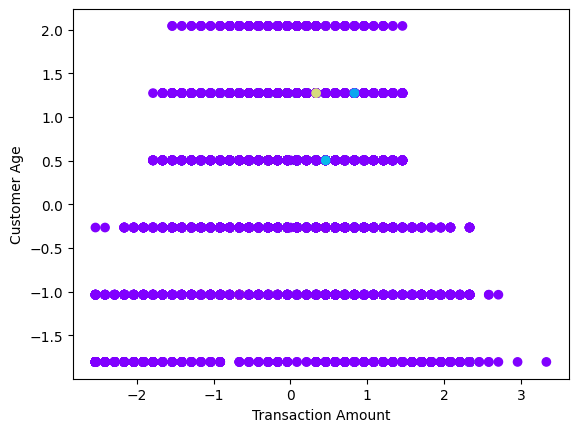

In [51]:
plt.scatter(x_scale[:,0], x_scale[:,1], c=dbscan_labels, cmap='rainbow')
plt.xlabel("Transaction Amount")
plt.ylabel("Customer Age")
plt.show()

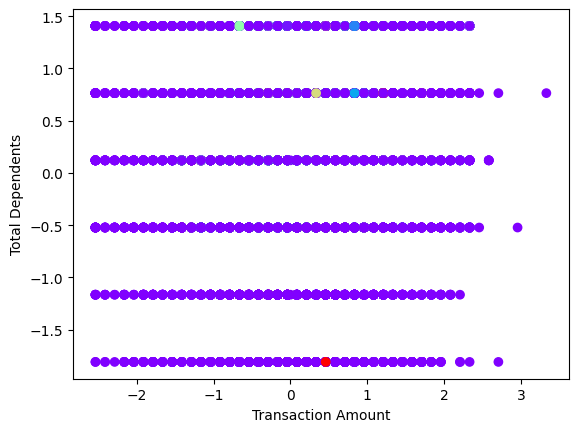

In [52]:
plt.scatter(x_scale[:,0], x_scale[:,2], c=dbscan_labels, cmap='rainbow')
plt.xlabel("Transaction Amount")
plt.ylabel("Total Dependents")
plt.show()

### K-Means

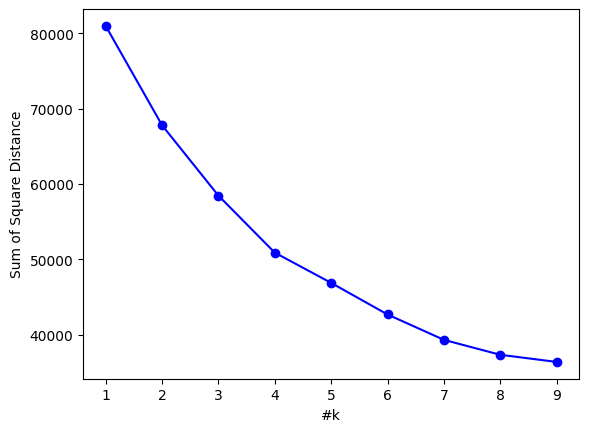

In [29]:
ssd = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_scale)
    ssd.append(km.inertia_)

plt.plot(K, ssd, 'bo-')
plt.xlabel('#k')
plt.ylabel('Sum of Square Distance')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(x_scale)

KMeans(n_clusters=7)

In [31]:
print(kmeans.cluster_centers_)

[[-0.10715562  0.03271027 -1.60608305  0.46816443  2.92482254  0.23734225
  -0.33528047 -0.09800644]
 [ 1.38101463 -1.05660704  0.1795166  -0.35525868 -0.29455707 -0.10087206
   0.12887182  1.27240493]
 [-0.02027808  0.3742747   0.021059   -0.66351552 -0.16038468 -0.77301231
   1.41641782 -0.03684391]
 [-0.08009249  0.45169979  0.09368942 -0.29051977 -0.23966988 -0.94351289
  -0.64125878 -0.05985114]
 [-0.10115014  0.46681446  0.1464227  -0.09747498 -0.26918374  1.05986893
  -0.33758466 -0.06779522]
 [ 0.0507698   0.16368587  0.04648213  2.17535931 -0.11391355  0.92354924
  -0.84219566  0.06138094]
 [-1.52574939 -0.8566797   0.32310668 -0.34793917 -0.29191468  0.01240655
   0.2037808  -1.45649848]]


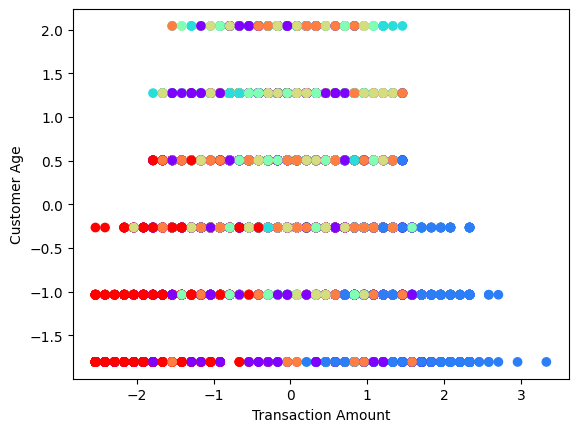

In [32]:
plt.scatter(x_scale[:,0],x_scale[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Transaction Amount")
plt.ylabel("Customer Age")
plt.show()

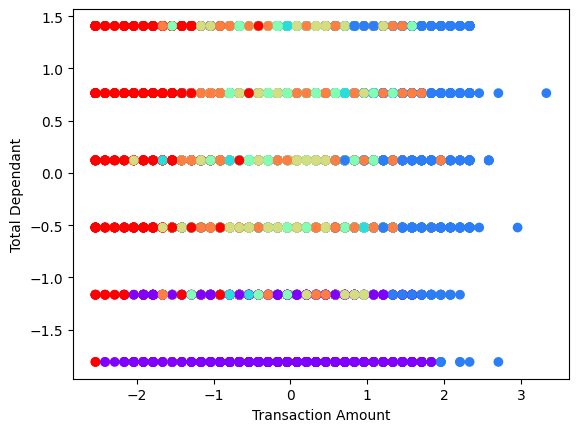

In [33]:
plt.scatter(x_scale[:,0],x_scale[:,2], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Transaction Amount")
plt.ylabel("Total Dependant")
plt.show()

### Hierarchical Clustering

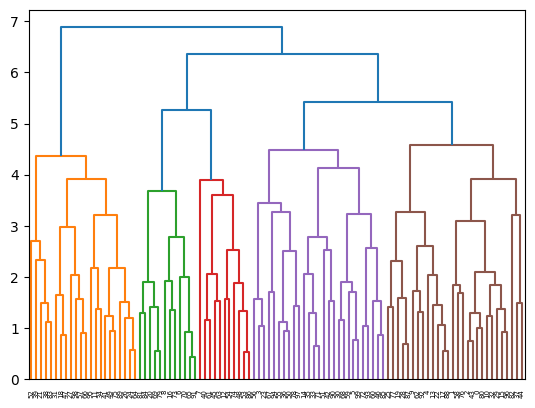

In [34]:
dendrogram = sch.dendrogram(sch.linkage(x_scale[:100], method='complete'))

In [35]:
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc.fit(x_scale)

AgglomerativeClustering(n_clusters=5)

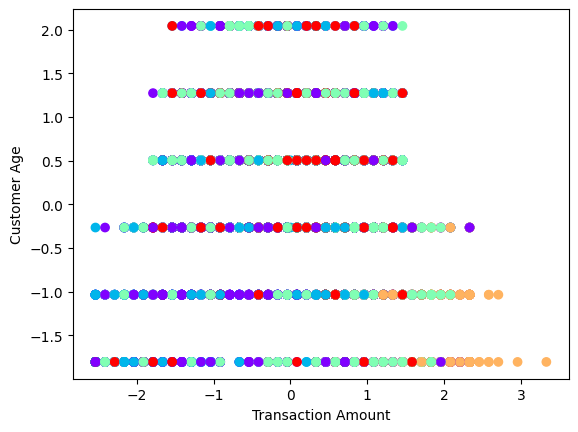

In [36]:
plt.scatter(x_scale[:,0],x_scale[:,1], c=hc.labels_, cmap='rainbow')
plt.xlabel("Transaction Amount")
plt.ylabel("Customer Age")
plt.show()

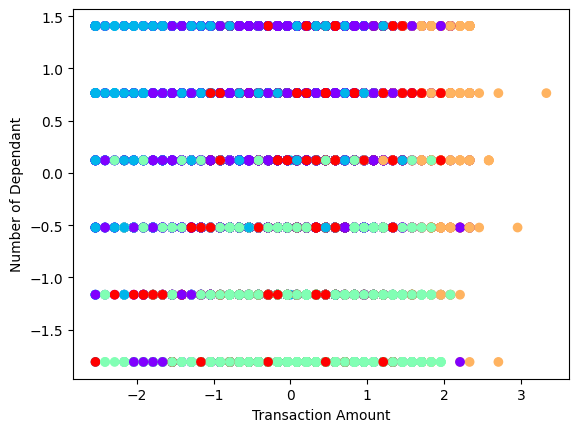

In [37]:
plt.scatter(x_scale[:,0],x_scale[:,2], c=hc.labels_, cmap='rainbow')
plt.xlabel("Transaction Amount")
plt.ylabel("Number of Dependant")
plt.show()

### Gaussian Mixture Model (GMM)

In [54]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

bic_scores = []
K = range(1, 10)  # trying different numbers of clusters
for k in K:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(x_scale)
    bic_scores.append(gmm.bic(x_scale))

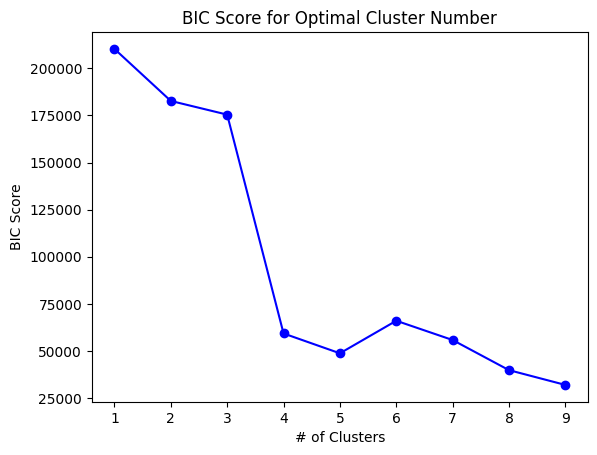

In [55]:
# Plot BIC scores to find the "elbow"
plt.plot(K, bic_scores, 'bo-')
plt.xlabel('# of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score for Optimal Cluster Number')
plt.show()

In [56]:
optimal_k = 4  # assume 4 clusters from BIC analysis; adjust based on the plot
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(x_scale)

# Assign each data point to a cluster
gmm_labels = gmm.predict(x_scale)


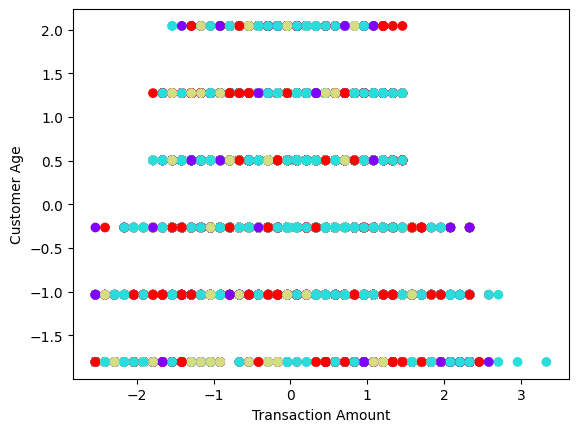

In [57]:
plt.scatter(x_scale[:,0], x_scale[:,1], c=gmm_labels, cmap='rainbow')
plt.xlabel("Transaction Amount")
plt.ylabel("Customer Age")
plt.show()

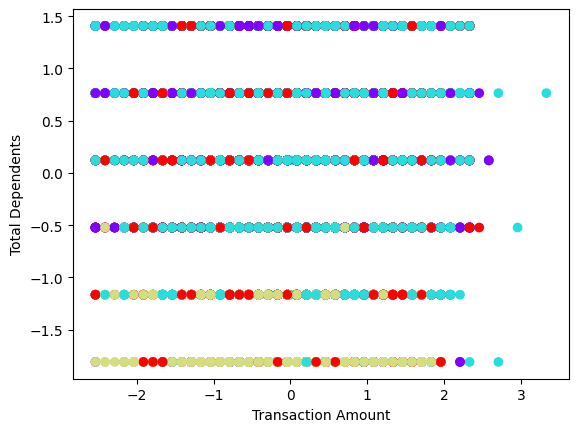

In [58]:
plt.scatter(x_scale[:,0], x_scale[:,2], c=gmm_labels, cmap='rainbow')
plt.xlabel("Transaction Amount")
plt.ylabel("Total Dependents")
plt.show()

### OPTICS Algorithm

In [70]:
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score

optics_model = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
optics_labels = optics_model.fit_predict(x_scale)


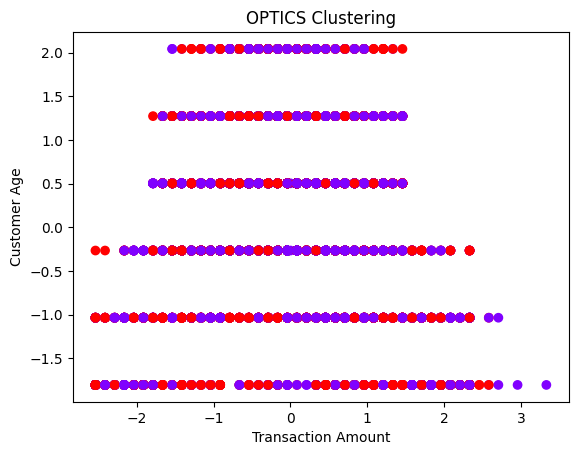

In [71]:
plt.scatter(x_scale[:, 0], x_scale[:, 1], c=optics_labels, cmap='rainbow')
plt.xlabel("Transaction Amount")
plt.ylabel("Customer Age")
plt.title("OPTICS Clustering")
plt.show()

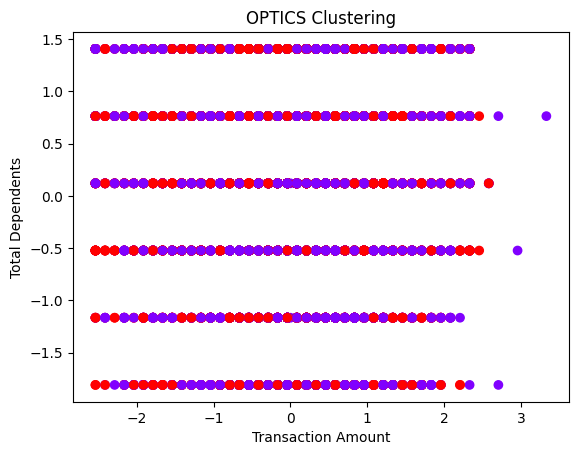

In [72]:
plt.scatter(x_scale[:, 0], x_scale[:, 2], c=optics_labels, cmap='rainbow')
plt.xlabel("Transaction Amount")
plt.ylabel("Total Dependents")
plt.title("OPTICS Clustering")
plt.show()

## Model Evaluation

In [73]:
# prompt: evaluate the hc model and kmeans model, compare both result, compare using davies boulding and shilhoutte score

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate KMeans
kmeans_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(x_scale, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(x_scale, kmeans_labels)

# Evaluate Hierarchical Clustering
hc_labels = hc.labels_
hc_silhouette = silhouette_score(x_scale, hc_labels)
hc_davies_bouldin = davies_bouldin_score(x_scale, hc_labels)

# Evaluate DBSCAN
dbscan_silhouette = silhouette_score(x_scale, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(x_scale, dbscan_labels)

# Evaluate GMM
gmm_silhouette = silhouette_score(x_scale, gmm_labels)
gmm_davies_bouldin = davies_bouldin_score(x_scale, gmm_labels)

# Evaluate Optics Algoritm
optics_silhouette = silhouette_score(x_scale, optics_labels)
optics_davies_bouldin = davies_bouldin_score(x_scale, optics_labels)

# Compare the results
print("KMeans:")
print("Silhouette Score:", kmeans_silhouette)
print("Davies-Bouldin Index:", kmeans_davies_bouldin)

print("\nHierarchical Clustering:")
print("Silhouette Score:", hc_silhouette)
print("Davies-Bouldin Index:", hc_davies_bouldin)

print("\nDBSCAN:")
print("Silhouette Score:", dbscan_silhouette)
print("Davies-Bouldin Index:", dbscan_davies_bouldin)

print("\nGMM:")
print("Silhouette Score:", gmm_silhouette)
print("Davies-Bouldin Index:", gmm_davies_bouldin)

print("\nOPTICS:")
print("Silhouette Score:", optics_silhouette)
print("Davies-Bouldin Index:", optics_davies_bouldin)

# Interpretation:
# Higher Silhouette Score indicates better-defined clusters.
# Lower Davies-Bouldin Index indicates better separation between clusters.

KMeans:
Silhouette Score: 0.1763172787601731
Davies-Bouldin Index: 1.471394249783901

Hierarchical Clustering:
Silhouette Score: 0.14486221835272517
Davies-Bouldin Index: 1.7276244544892652

DBSCAN:
Silhouette Score: -0.4125308815287795
Davies-Bouldin Index: 1.51964888874272

GMM:
Silhouette Score: 0.1323048475639307
Davies-Bouldin Index: 1.940390803613325

OPTICS:
Silhouette Score: 0.17370311411094952
Davies-Bouldin Index: 2.1876899034192006


In [39]:
# prompt: predict the cluster using kmeans for each data, assign it to df as cluster column

# Assuming you have already performed KMeans clustering as shown in your code
df['cluster'] = kmeans.labels_
df['cluster'] = df['cluster'].astype(int)

In [40]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,cluster
0,768805383,0,45.00,M,3,High School,Married,$60K - $80K,Blue,39,...,777,"11,914.00",1.33,1144,42,1.62,0.06,0.00,1.00,4
1,818770008,0,49.00,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,"7,392.00",1.54,1291,33,3.71,0.10,0.00,1.00,3
2,713982108,0,46.33,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,"3,418.00",2.59,1887,20,2.33,0.00,0.00,1.00,4
3,769911858,0,40.00,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.00,1.41,1171,20,2.33,0.76,0.00,1.00,2
4,709106358,0,40.00,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,"4,716.00",2.17,816,28,2.50,0.00,0.00,1.00,4


# Summary

Based on Model Evaluation result, evaluation indicator showing Kmeans have better performance than HC to cluster customer.

In [74]:
# Compare the results
print("KMeans:")
print("Silhouette Score:", kmeans_silhouette)
print("Davies-Bouldin Index:", kmeans_davies_bouldin)

print("\nHierarchical Clustering:")
print("Silhouette Score:", hc_silhouette)
print("Davies-Bouldin Index:", hc_davies_bouldin)

print("\nDBSCAN:")
print("Silhouette Score:", dbscan_silhouette)
print("Davies-Bouldin Index:", dbscan_davies_bouldin)

print("\nGMM:")
print("Silhouette Score:", gmm_silhouette)
print("Davies-Bouldin Index:", gmm_davies_bouldin)

print("\nOPTICS:")
print("Silhouette Score:", optics_silhouette)
print("Davies-Bouldin Index:", optics_davies_bouldin)


# Interpretation:
# Higher Silhouette Score indicates better-defined clusters.
# Lower Davies-Bouldin Index indicates better separation between clusters.

KMeans:
Silhouette Score: 0.1763172787601731
Davies-Bouldin Index: 1.471394249783901

Hierarchical Clustering:
Silhouette Score: 0.14486221835272517
Davies-Bouldin Index: 1.7276244544892652

DBSCAN:
Silhouette Score: -0.4125308815287795
Davies-Bouldin Index: 1.51964888874272

GMM:
Silhouette Score: 0.1323048475639307
Davies-Bouldin Index: 1.940390803613325

OPTICS:
Silhouette Score: 0.17370311411094952
Davies-Bouldin Index: 2.1876899034192006


Attrition rate per cluster also checked to see if there is any significant difference for attriation rate between cluster, this finding will be use to create a new product analysis

In [63]:
attrition_by_cluster = df.groupby('cluster')['Attrition_Flag'].mean()
attrition_by_cluster

cluster
0   0.08
1   0.16
2   0.11
3   0.26
4   0.17
5   0.16
6   0.12
Name: Attrition_Flag, dtype: float64

In [64]:
df_final['Attrition_Flag'] = df['Attrition_Flag']
df_final['Cluster'] = df['cluster']
df_final.head()

C:\Users\arima\AppData\Local\Temp\ipykernel_27368\738583302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Attrition_Flag'] = df['Attrition_Flag']
C:\Users\arima\AppData\Local\Temp\ipykernel_27368\738583302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Cluster'] = df['cluster']


,Customer_Age,Dependent_count,Total_Relationship_Count,Credit_Limit,Average_Spend,Gender_M,Avg_Utilization_Ratio,Months_on_book,Attrition_Flag,Cluster
0,45.00,3,5,"12,691.00",228.80,1.00,0.06,39,0.00,4.00
1,49.00,5,6,"8,256.00",215.17,0.00,0.10,44,0.00,3.00
2,46.33,3,4,"3,418.00",471.75,1.00,0.00,36,0.00,4.00
3,40.00,4,3,"3,313.00",390.33,0.00,0.76,34,0.00,2.00
4,40.00,3,5,"4,716.00",163.20,1.00,0.00,21,0.00,4.00


In [44]:
# Calculate attrition rate for each cluster
cluster_analysis = df_final.groupby('Cluster').mean()

cluster_analysis

,Customer_Age,Dependent_count,Total_Relationship_Count,Credit_Limit,Average_Spend,Gender_M,Avg_Utilization_Ratio,Months_on_book,Attrition_Flag
Cluster,,,,,,,,,
0.00,45.74,2.41,1.99,"13,542.16","7,081.48",0.58,0.19,35.61,0.08
1.00,46.87,2.31,4.07,"7,979.46","1,169.70",0.48,0.29,36.42,0.16
2.00,46.59,2.41,3.86,"6,785.98","1,364.59",0.36,0.31,36.12,0.11
3.00,46.31,2.41,3.89,"7,678.35","1,444.48",0.39,0.29,35.86,0.26
4.00,46.44,2.32,4.01,"8,640.32","1,279.13",0.52,0.27,36.01,0.17
5.00,45.98,2.29,3.84,"10,782.78","1,889.35",0.56,0.25,35.72,0.16
6.00,45.71,2.25,4.09,"8,591.83","1,232.96",0.52,0.27,35.34,0.12


by annalyzing performance of each cluster, we can make 2 products
1. cluster 5 is people with less number of relationship and high spending, this group has high average spend and low attrition make it a good target for a new product, some product that we can offer is credit loan for vehicle to increase thier utilization ratio
2. Cluster 1 has high attrition flag and high number of dependent, the utilization ratio is quite high so we need to lower down the interest rate or make long tenure payment so they can keep paying while not be a burden for the family.